##### <p> Samuel Wolfe <br> June 25th, 2023 <br> MSBA 206 <br> DMBA Chapter 5 </p>

In [117]:
import pandas as pd
import seaborn as sns
import numpy
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pylab as plt
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart

##### 5.1
See code below. Error rate is 8.65<br>

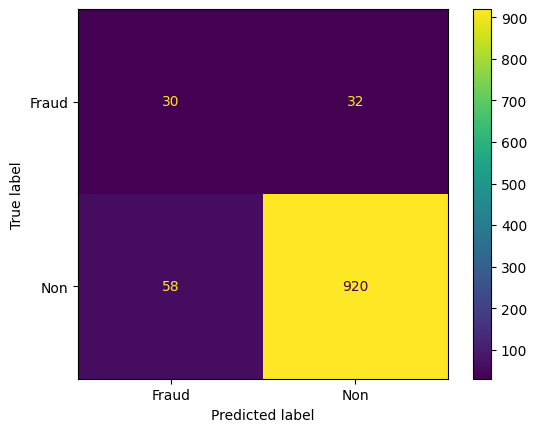

8.65


In [118]:
#constructing np array, left list is positive values right list is negative values.
cfmTransData = numpy.array([[30,32],[58,920]])
#turning into matrix for display
confusion_matrix = numpy.asmatrix(cfmTransData)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Fraud", "Non"])
cm_display.plot()
plt.show()
errorRate = round(((58+32)/1040) * 100, 2)
print(errorRate)

##### 5.4
For purposes of this example, since it only details fraudulent vs non fraudulent transactions, I am assuming we want to for sure know who <br>
has the highest chance at being fraudulent.<br>
5.4.a.  Because the Decile Lift Chart for Transaction Data in Figure 5.12 appears to show a good model, if we follow the model we <br>&emsp; &emsp;
        will gain 6 units of lift on average for the first 10% of the top predicted values and 2 units of lift on average for the second 10%.<br>&emsp; &emsp;
5.4.b.  What this might be used for in this case is after running the analysis you focus your efforts on the top 10% of the predicted fraudulent.<br>&emsp; &emsp;
        This saves your group time, effort, and resources not accidentally working a non-fraudulent case.<br>
5.4.c.  See new chart below. The error rate becomes 5.96%.<br>
5.4.d.  Generally we want to reduce our error rate. In this case where attempting to catch fraudulent cases. If we classify every case as non fraudulent<br>&emsp; &emsp;
        we are defeating the purpose of this model. With the decile lift chart we get a good estimate of where to focus our resources. In this case <br>&emsp; &emsp;
        we learn to focus our efforts on the top 20% of the transactions. This is better than not using our resources to find any fraud.<br>

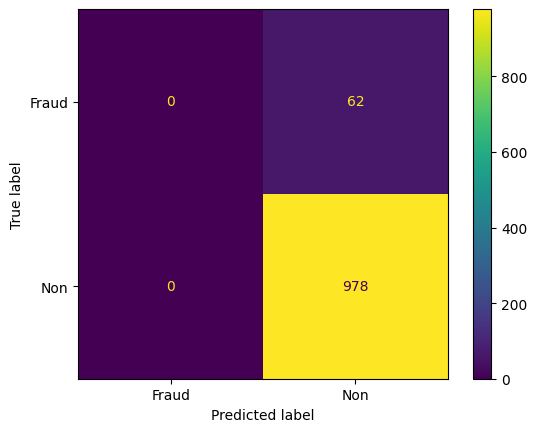

5.96


In [119]:
#constructing np array, left list is positive values right list is negative values.
cfmTransData = numpy.array([[0,62],[0,978]])
#turning into matrix for display
confusion_matrix = numpy.asmatrix(cfmTransData)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Fraud", "Non"])
cm_display.plot()
plt.show()
errorRate = round(((0+62)/1040) * 100, 2)
print(errorRate)

##### 5.5
5.5.a.  See code below for chart. Error Rate non adjusted is 27.5% with a Fraudulent classification rate of 45%<br>
5.5.b.  The adjusted misclassification rate is 32.4%.<br>
5.5.c.  The new fraudulent classification rate is 67.04%<br>

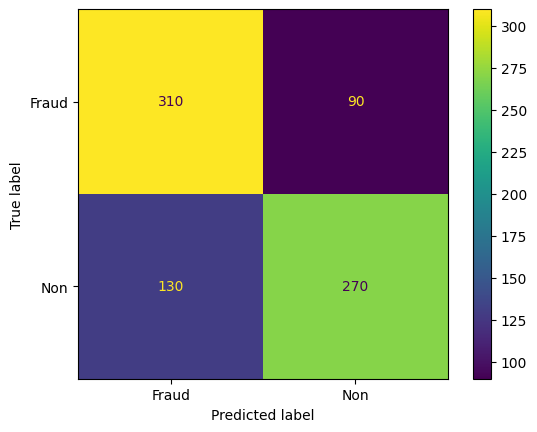

27.5
45.0


In [120]:
#constructing np array, left list is positive values right list is negative values.
a=310
b=90
c=130
d=270
t=800
cfmTransData = numpy.array([[a,b],[c,d]])
#turning into matrix for display
confusion_matrix = numpy.asmatrix(cfmTransData)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Fraud", "Non"])
cm_display.plot()
plt.show()
errorRate = round(((b+c)/t) * 100, 2)
print(errorRate)
predF = round(((b+d)/t) * 100, 2)
print(predF)

In [121]:
#constructing np array, left list is positive values right list is negative values.
#Fa = 1% of 50% 
#Na = 99% of 50%
Fa = 50
Na = 0.5051
#values adjusted 
aa = a/Fa
ba = b/Fa
ca = c/Na
da = d/Na
errorRateNew = round(((ba+ca)/t) * 100, 2)
print(errorRateNew)
predFNew = round(((ba+da)/t) * 100, 2)
print(predFNew)

32.4
67.04


##### 5.7
5.7.a.  Error Rates, sensitivity, specificity for cutoffs 0.25, 0.5, 0.75
        Cutoff1 = 0.25
5.7.b.  Decile Lift Chart

In [122]:

#establish cuttoff values
cutoff1 = 0.25
cutoff2 = 0.5
cutoff3 = 0.75
#load table and sort
fileLocation = r'E:\Aliit\School\MSBA\206\dmba-datasets\Table_5-7.csv'
dfT57 = pd.read_csv(fileLocation)
dfT57 = dfT57.sort_values(by=['Propensity_of_1'], ascending=False)
#pulling actual results
actT57 = dfT57.Actual.tolist()
#Cutoff of 0.25
predT57C1 = [1 if p > cutoff1 else 0 for p in dfT57.Propensity_of_1]
#Cutoff of 0.5
predT57C2 = [1 if p > cutoff2 else 0 for p in dfT57.Propensity_of_1]
#Cutoff of 0.75
predT57C3 = [1 if p > cutoff3 else 0 for p in dfT57.Propensity_of_1]
#building matrix
cmT57C1 = metrics.confusion_matrix(actT57, predT57C1)
cmT57C2 = metrics.confusion_matrix(actT57, predT57C2)
cmT57C3 = metrics.confusion_matrix(actT57, predT57C3)

#accuracy to error
errT57C1 = round(1 - metrics.accuracy_score(actT57, predT57C1),2)
errT57C2 = round(1 - metrics.accuracy_score(actT57, predT57C2),2)
errT57C3 = round(1 - metrics.accuracy_score(actT57, predT57C3),2)

#sensitivity 
senT57C1 = round(metrics.recall_score(actT57, predT57C1),2)
senT57C2 = round(metrics.recall_score(actT57, predT57C2),2)
senT57C3 = round(metrics.recall_score(actT57, predT57C3),2)

#specificity
spcT57C1 = round(metrics.recall_score(actT57, predT57C1,pos_label=0),2)
spcT57C2 = round(metrics.recall_score(actT57, predT57C2,pos_label=0),2)
spcT57C3 = round(metrics.recall_score(actT57, predT57C3,pos_label=0),2)

In [123]:
#results
#C1
print('Cutoff value of ', cutoff1)
print('Error Rate: ', errT57C1)
print('Sensitivity: ', senT57C1)
print('Specificity: ', spcT57C1)
classificationSummary(dfT57.Actual, predT57C1, class_names=(0,1))

Cutoff value of  0.25
Error Rate:  0.4
Sensitivity:  1.0
Specificity:  0.53
Confusion Matrix (Accuracy 0.6000)

       Prediction
Actual 0 1
     0 9 8
     1 0 3


In [124]:
#results
#C2
print('Cutoff value of ', cutoff2)
print('Error Rate: ', errT57C2)
print('Sensitivity: ', senT57C2)
print('Specificity: ', spcT57C2)
classificationSummary(dfT57.Actual, predT57C2, class_names=(0,1))

Cutoff value of  0.5
Error Rate:  0.1
Sensitivity:  1.0
Specificity:  0.88
Confusion Matrix (Accuracy 0.9000)

       Prediction
Actual  0  1
     0 15  2
     1  0  3


In [125]:
#results
#C3
print('Cutoff value of ', cutoff3)
print('Error Rate: ', errT57C3)
print('Sensitivity: ', senT57C3)
print('Specificity: ', spcT57C3)
classificationSummary(dfT57.Actual, predT57C3, class_names=(0,1))

Cutoff value of  0.75
Error Rate:  0.05
Sensitivity:  0.67
Specificity:  1.0
Confusion Matrix (Accuracy 0.9500)

       Prediction
Actual  0  1
     0 17  0
     1  1  2


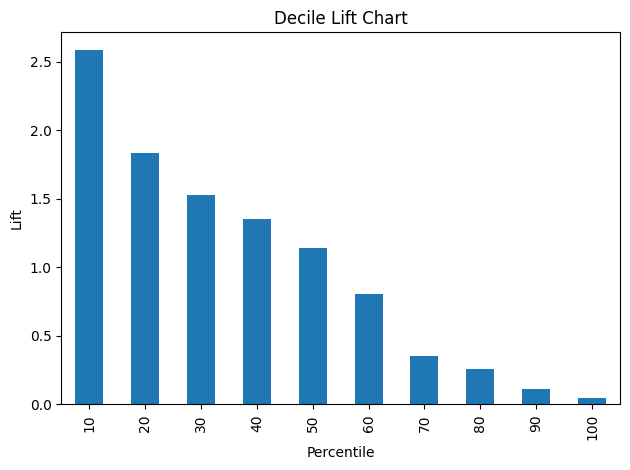

In [126]:
#5.7.b.
liftChart(dfT57.Propensity_of_1, labelBars=False)
plt.tight_layout()
plt.show()